In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
import pandas as pd

# Load the dataset
train_df = pd.read_csv("train.csv")

train_df.isnull().sum()




No                          0
material                    0
feedrate                    0
clamp_pressure              0
tool_condition              0
machining_finalized         0
passed_visual_inspection    4
dtype: int64

In [3]:
train_df.drop(columns=["material"], inplace=True)

In [4]:
train_df['passed_visual_inspection'] = train_df['passed_visual_inspection'].fillna('No')


In [5]:
train_df
train_df.to_csv('cleaned_train.csv', index=False)

In [6]:


# Path where experiment CSVs are located
experiment_folder = r"C:\Users\pavit\Desktop\CNC_MILLING\cnc_milling"

# Load train.csv (ensure it is in the same folder or provide full path)
train_csv_path = os.path.join(experiment_folder, r"C:\Users\pavit\Desktop\CNC_MILLING\cleaned_train.csv")
train_df = pd.read_csv(train_csv_path)

# Prepare to collect merged data
merged_data = []

# Loop through all 18 expected experiments (1 to 18)
for i in range(1, 19):
    filename = f"experiment_{i:02d}.csv"
    filepath = os.path.join(experiment_folder, filename)
    
    if os.path.exists(filepath):
        exp_df = pd.read_csv(filepath)
        
        # Get the row in train.csv corresponding to experiment No
        metadata = train_df[train_df["No"] == i]
        if metadata.empty:
            print(f"No matching metadata for experiment {i}")
            continue
        
        # Repeat metadata for each row in experiment
        metadata_repeated = pd.concat([metadata] * len(exp_df), ignore_index=True)
        
        # Concatenate experiment data with metadata
        merged_df = pd.concat([exp_df.reset_index(drop=True), metadata_repeated.reset_index(drop=True)], axis=1)
        merged_data.append(merged_df)
    else:
        print(f"File not found: {filename}")

# Combine all merged experiment+metadata files
final_df = pd.concat(merged_data, ignore_index=True)

#### Output final shape and sample
print("Final merged shape:", final_df.shape)
print(final_df.head())

##### save to CSV #####
final_df.to_csv("merged_dataset.csv", index=False)


Final merged shape: (25286, 54)
   X1_ActualPosition  X1_ActualVelocity  X1_ActualAcceleration  \
0              198.0                0.0                   0.00   
1              198.0              -10.8                -350.00   
2              196.0              -17.8                  -6.25   
3              194.0              -18.0                   0.00   
4              193.0              -17.9                 -18.80   

   X1_CommandPosition  X1_CommandVelocity  X1_CommandAcceleration  \
0               198.0                 0.0                0.000000   
1               198.0               -13.6             -358.000000   
2               196.0               -17.9               -0.000095   
3               194.0               -17.9               -0.000095   
4               192.0               -17.9                0.000095   

   X1_CurrentFeedback  X1_DCBusVoltage  X1_OutputCurrent  X1_OutputVoltage  \
0                0.18           0.0207             329.0              2.77   


In [7]:
final_df

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,No,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,198.0,0.00,0.00,198.0,0.00,0.000000,0.18,0.0207,329.0,2.77,...,1.0,0.0,50.0,Starting,1,6,4.0,unworn,yes,yes
1,198.0,-10.80,-350.00,198.0,-13.60,-358.000000,-10.90,0.1860,328.0,23.30,...,1.0,4.0,50.0,Prep,1,6,4.0,unworn,yes,yes
2,196.0,-17.80,-6.25,196.0,-17.90,-0.000095,-8.59,0.1400,328.0,30.60,...,1.0,7.0,50.0,Prep,1,6,4.0,unworn,yes,yes
3,194.0,-18.00,0.00,194.0,-17.90,-0.000095,-6.11,0.1300,327.0,30.30,...,1.0,7.0,50.0,Prep,1,6,4.0,unworn,yes,yes
4,193.0,-17.90,-18.80,192.0,-17.90,0.000095,-5.70,0.1140,328.0,30.50,...,1.0,7.0,50.0,Prep,1,6,4.0,unworn,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25281,144.0,-2.30,100.00,144.0,-2.57,0.977000,-5.05,0.0732,327.0,9.56,...,1.0,57.0,3.0,End,18,3,2.5,worn,yes,yes
25282,144.0,-2.47,25.00,144.0,-2.46,1.080000,-5.62,0.0996,327.0,10.30,...,1.0,57.0,3.0,End,18,3,2.5,worn,yes,yes
25283,143.0,-2.20,81.20,143.0,-2.35,1.170000,-4.42,0.0539,327.0,7.79,...,1.0,57.0,3.0,End,18,3,2.5,worn,yes,yes
25284,143.0,-2.05,68.70,143.0,-2.23,1.260000,-5.83,0.0809,327.0,8.32,...,1.0,57.0,3.0,End,18,3,2.5,worn,yes,yes


In [8]:
final_df.info()
final_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25286 entries, 0 to 25285
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X1_ActualPosition          25286 non-null  float64
 1   X1_ActualVelocity          25286 non-null  float64
 2   X1_ActualAcceleration      25286 non-null  float64
 3   X1_CommandPosition         25286 non-null  float64
 4   X1_CommandVelocity         25286 non-null  float64
 5   X1_CommandAcceleration     25286 non-null  float64
 6   X1_CurrentFeedback         25286 non-null  float64
 7   X1_DCBusVoltage            25286 non-null  float64
 8   X1_OutputCurrent           25286 non-null  float64
 9   X1_OutputVoltage           25286 non-null  float64
 10  X1_OutputPower             25286 non-null  float64
 11  Y1_ActualPosition          25286 non-null  float64
 12  Y1_ActualVelocity          25286 non-null  float64
 13  Y1_ActualAcceleration      25286 non-null  flo

X1_ActualPosition            0
X1_ActualVelocity            0
X1_ActualAcceleration        0
X1_CommandPosition           0
X1_CommandVelocity           0
X1_CommandAcceleration       0
X1_CurrentFeedback           0
X1_DCBusVoltage              0
X1_OutputCurrent             0
X1_OutputVoltage             0
X1_OutputPower               0
Y1_ActualPosition            0
Y1_ActualVelocity            0
Y1_ActualAcceleration        0
Y1_CommandPosition           0
Y1_CommandVelocity           0
Y1_CommandAcceleration       0
Y1_CurrentFeedback           0
Y1_DCBusVoltage              0
Y1_OutputCurrent             0
Y1_OutputVoltage             0
Y1_OutputPower               0
Z1_ActualPosition            0
Z1_ActualVelocity            0
Z1_ActualAcceleration        0
Z1_CommandPosition           0
Z1_CommandVelocity           0
Z1_CommandAcceleration       0
Z1_CurrentFeedback           0
Z1_DCBusVoltage              0
Z1_OutputCurrent             0
Z1_OutputVoltage             0
S1_Actua

In [9]:
final_df.duplicated().sum()

np.int64(331)

In [10]:
final_df = final_df.drop_duplicates()

In [11]:
final_df.duplicated().sum()

np.int64(0)

In [12]:
zero_columns = final_df.columns[(final_df == 0).all()]
print("Columns with all zero values:", zero_columns.tolist())


Columns with all zero values: ['Z1_CurrentFeedback', 'Z1_DCBusVoltage', 'Z1_OutputCurrent', 'Z1_OutputVoltage']


In [13]:
final_df = final_df.loc[:, (final_df != 0).any(axis=0)]


In [14]:
final_df

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,No,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,198.0,0.00,0.00,198.0,0.00,0.000000,0.18,0.0207,329.0,2.77,...,1.0,0.0,50.0,Starting,1,6,4.0,unworn,yes,yes
1,198.0,-10.80,-350.00,198.0,-13.60,-358.000000,-10.90,0.1860,328.0,23.30,...,1.0,4.0,50.0,Prep,1,6,4.0,unworn,yes,yes
2,196.0,-17.80,-6.25,196.0,-17.90,-0.000095,-8.59,0.1400,328.0,30.60,...,1.0,7.0,50.0,Prep,1,6,4.0,unworn,yes,yes
3,194.0,-18.00,0.00,194.0,-17.90,-0.000095,-6.11,0.1300,327.0,30.30,...,1.0,7.0,50.0,Prep,1,6,4.0,unworn,yes,yes
4,193.0,-17.90,-18.80,192.0,-17.90,0.000095,-5.70,0.1140,328.0,30.50,...,1.0,7.0,50.0,Prep,1,6,4.0,unworn,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25281,144.0,-2.30,100.00,144.0,-2.57,0.977000,-5.05,0.0732,327.0,9.56,...,1.0,57.0,3.0,End,18,3,2.5,worn,yes,yes
25282,144.0,-2.47,25.00,144.0,-2.46,1.080000,-5.62,0.0996,327.0,10.30,...,1.0,57.0,3.0,End,18,3,2.5,worn,yes,yes
25283,143.0,-2.20,81.20,143.0,-2.35,1.170000,-4.42,0.0539,327.0,7.79,...,1.0,57.0,3.0,End,18,3,2.5,worn,yes,yes
25284,143.0,-2.05,68.70,143.0,-2.23,1.260000,-5.83,0.0809,327.0,8.32,...,1.0,57.0,3.0,End,18,3,2.5,worn,yes,yes


In [15]:
final_df["Machining_Process"].unique()

array(['Starting', 'Prep', 'Layer 1 Up', 'Layer 1 Down', 'Repositioning',
       'Layer 2 Up', 'Layer 2 Down', 'Layer 3 Up', 'Layer 3 Down', 'end',
       'End'], dtype=object)

In [16]:
final_df = final_df.replace('end', 'End')

In [17]:
##### save to CSV #####
final_df.to_csv("merged_dataset.csv", index=False)

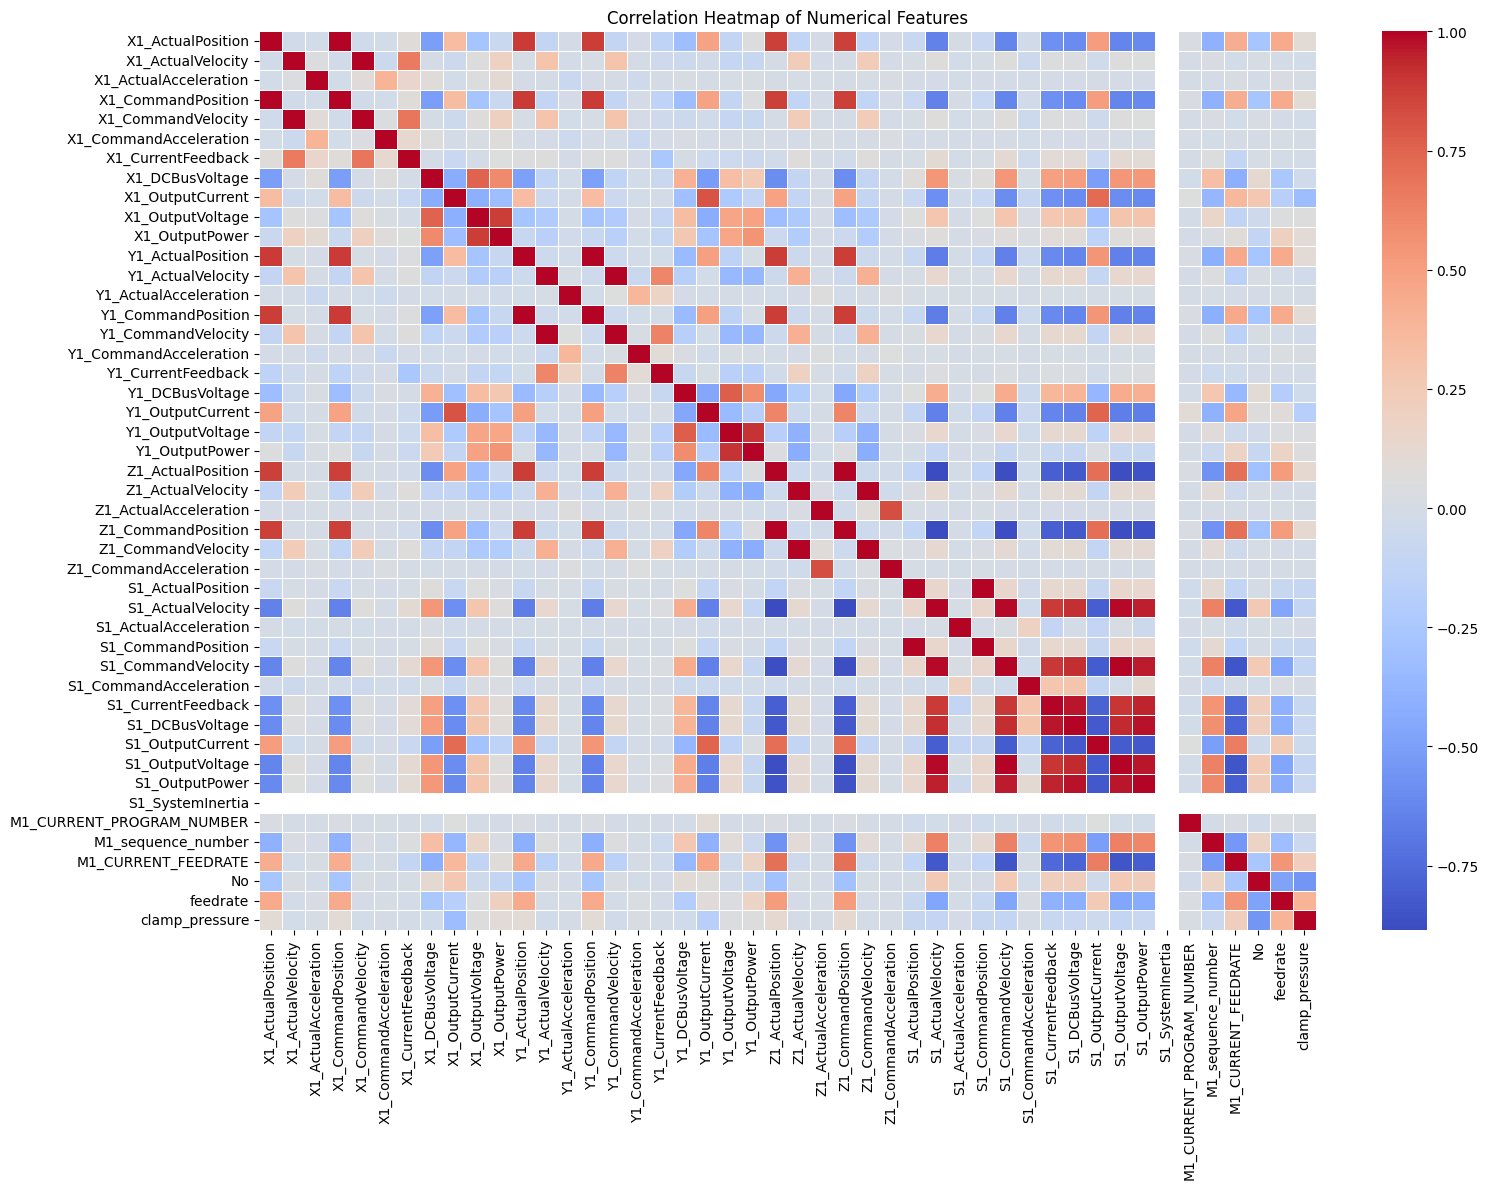

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = final_df.corr(numeric_only=True)

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

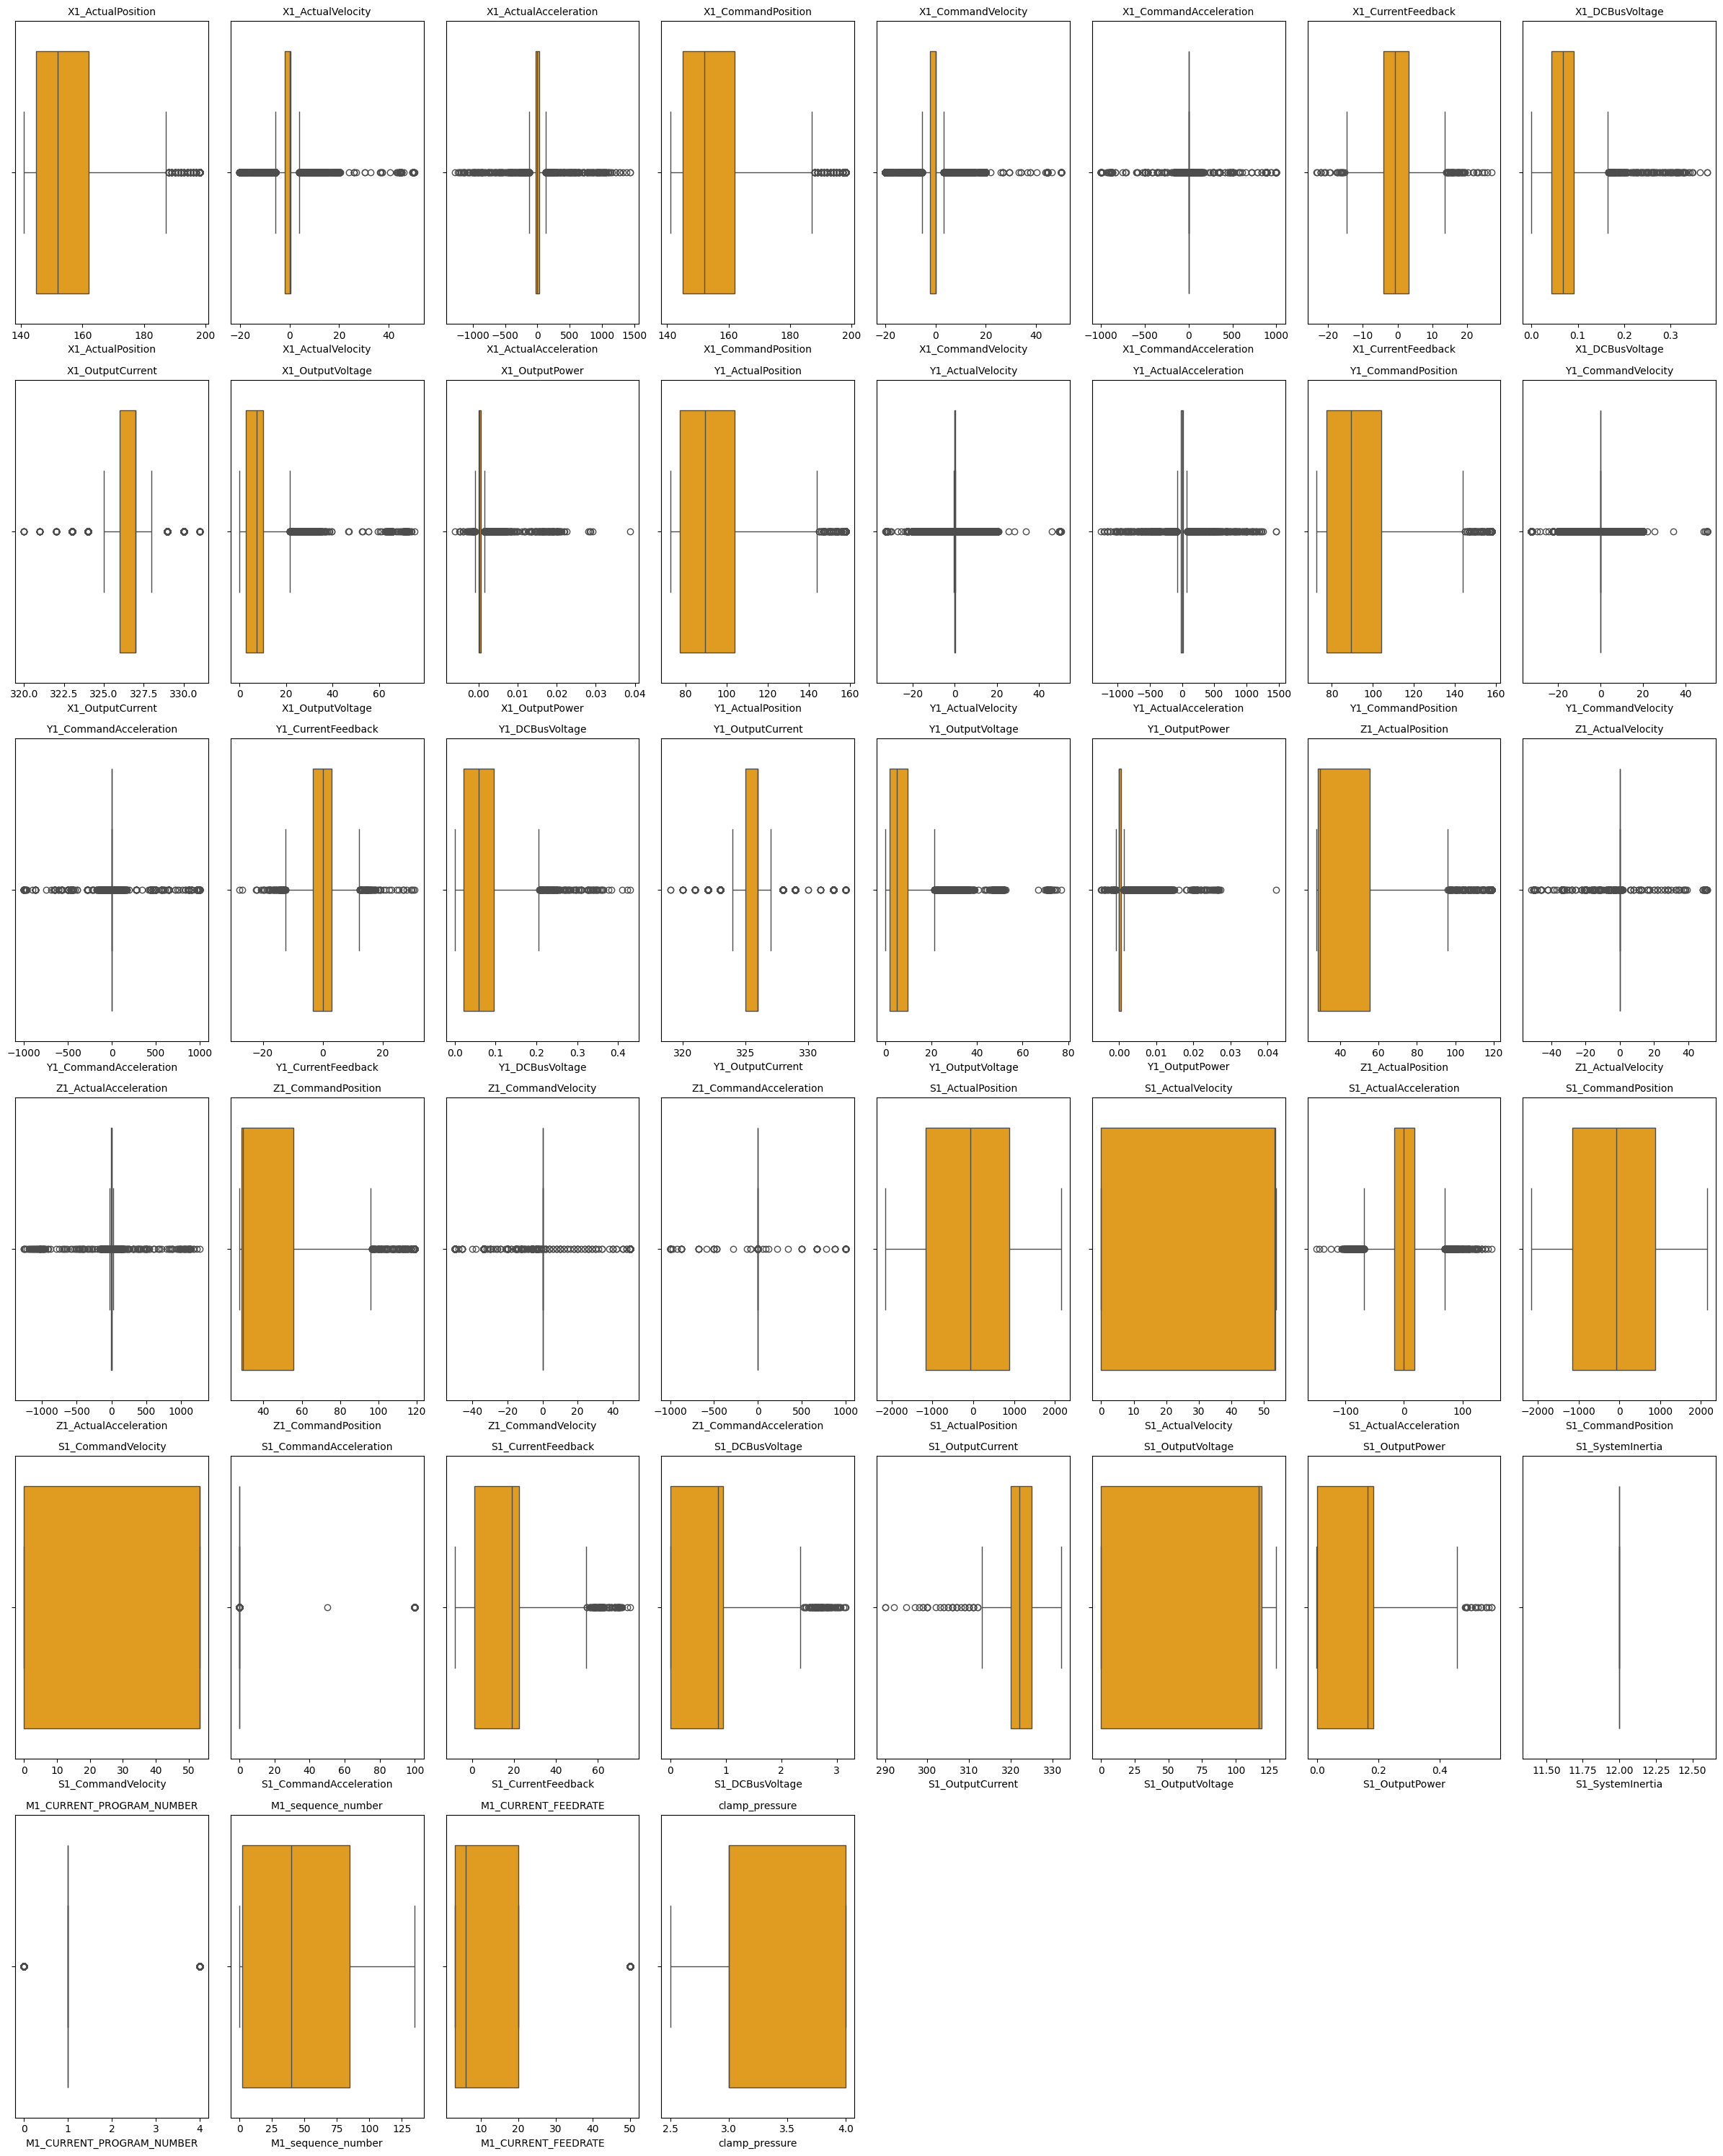

In [19]:
# Boxplots for outlier detection (sample columns)
numeric_columns = final_df.select_dtypes(include='float64').columns
sample_columns = numeric_columns[:44] 

plt.figure(figsize=(24, 30))
for i, col in enumerate(sample_columns, 1):
    plt.subplot(6, 8, i)
    sns.boxplot(x= final_df[col], color='orange')
    plt.title(col, fontsize=10)
    plt.tight_layout()

plt.show()


In [20]:
from scipy.stats import zscore

# Select only numeric columns
numeric_cols = final_df.select_dtypes(include='float64').columns

# Compute z-scores
z_scores = final_df[numeric_cols].apply(zscore)

# Detect outliers: any z-score > 3 or < -3
outlier_mask = (z_scores.abs() > 3)

# Count how many outliers per column
outlier_counts = outlier_mask.sum()
print(outlier_counts[outlier_counts > 0].sort_values(ascending=False))


X1_CommandVelocity           1033
X1_ActualVelocity            1020
Z1_CommandVelocity            839
Z1_ActualVelocity             835
Y1_ActualVelocity             809
Y1_CommandVelocity            803
Y1_OutputCurrent              669
Y1_OutputVoltage              648
Y1_OutputPower                610
X1_OutputVoltage              537
X1_OutputPower                373
Y1_ActualAcceleration         335
Y1_CommandAcceleration        299
X1_ActualAcceleration         277
M1_CURRENT_PROGRAM_NUMBER     249
X1_CommandAcceleration        234
X1_DCBusVoltage               167
Z1_ActualAcceleration         152
Y1_DCBusVoltage               146
Z1_CommandAcceleration        121
Y1_CurrentFeedback            113
X1_CurrentFeedback            109
S1_CommandAcceleration         98
S1_DCBusVoltage                96
S1_CurrentFeedback             95
S1_ActualAcceleration          91
X1_OutputCurrent               42
S1_OutputPower                 33
S1_OutputCurrent               29
dtype: int64


c:\Users\pavit\Desktop\CNC_MILLING\.venv\Lib\site-packages\pandas\core\apply.py:1081: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results[i] = self.func(v, *self.args, **self.kwargs)


In [22]:
def iqr_cap(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series.clip(lower, upper)

for col in final_df.select_dtypes(include='number').columns:
    final_df[col] = iqr_cap(final_df[col])


In [23]:
from scipy.stats import zscore

# Select only numeric columns
numeric_cols = final_df.select_dtypes(include='float64').columns

# Compute z-scores
z_scores = final_df[numeric_cols].apply(zscore)

# Detect outliers: any z-score > 3 or < -3
outlier_mask = (z_scores.abs() > 3)

# Count how many outliers per column
outlier_counts = outlier_mask.sum()
print(outlier_counts[outlier_counts > 0].sort_values(ascending=False))


Y1_DCBusVoltage       161
X1_CurrentFeedback    113
S1_DCBusVoltage        96
S1_CurrentFeedback     95
S1_OutputPower         33
dtype: int64


c:\Users\pavit\Desktop\CNC_MILLING\.venv\Lib\site-packages\pandas\core\apply.py:1081: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results[i] = self.func(v, *self.args, **self.kwargs)
c:\Users\pavit\Desktop\CNC_MILLING\.venv\Lib\site-packages\pandas\core\apply.py:1081: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results[i] = self.func(v, *self.args, **self.kwargs)


C:\Users\pavit\AppData\Local\Temp\ipykernel_10044\3249966365.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=final_df, x='tool_condition', palette='Set2')


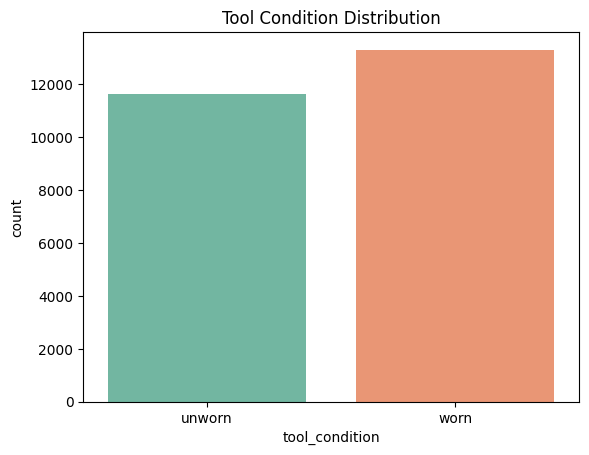

C:\Users\pavit\AppData\Local\Temp\ipykernel_10044\3249966365.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='tool_condition', y=col, data=final_df, palette='coolwarm')


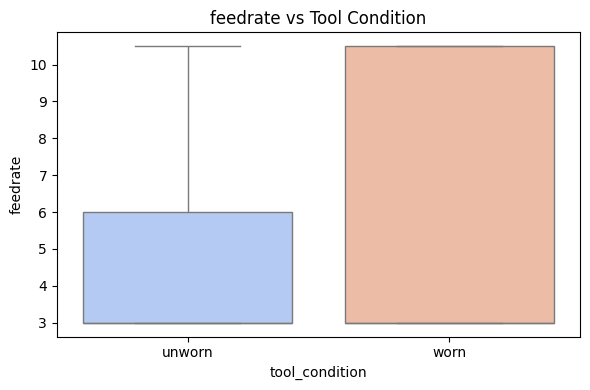

C:\Users\pavit\AppData\Local\Temp\ipykernel_10044\3249966365.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='tool_condition', y=col, data=final_df, palette='coolwarm')


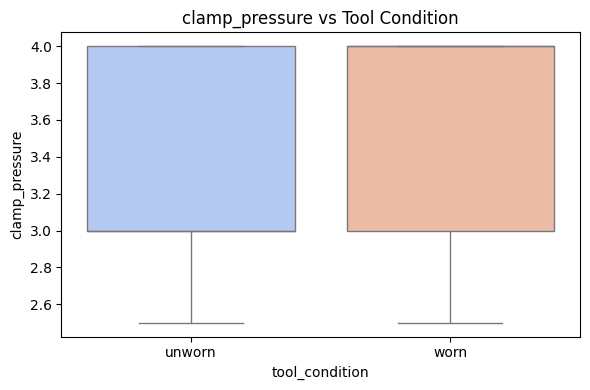

In [24]:
sns.countplot(data=final_df, x='tool_condition', palette='Set2')
plt.title("Tool Condition Distribution")
plt.show()

features = ['feedrate', 'clamp_pressure', 'vibration', 'material', 'spindle_speed']

for col in features:
    if col in final_df.columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x='tool_condition', y=col, data=final_df, palette='coolwarm')
        plt.title(f'{col} vs Tool Condition')
        plt.tight_layout()
        plt.show()




In [25]:
final_df.columns

Index(['X1_ActualPosition', 'X1_ActualVelocity', 'X1_ActualAcceleration',
       'X1_CommandPosition', 'X1_CommandVelocity', 'X1_CommandAcceleration',
       'X1_CurrentFeedback', 'X1_DCBusVoltage', 'X1_OutputCurrent',
       'X1_OutputVoltage', 'X1_OutputPower', 'Y1_ActualPosition',
       'Y1_ActualVelocity', 'Y1_ActualAcceleration', 'Y1_CommandPosition',
       'Y1_CommandVelocity', 'Y1_CommandAcceleration', 'Y1_CurrentFeedback',
       'Y1_DCBusVoltage', 'Y1_OutputCurrent', 'Y1_OutputVoltage',
       'Y1_OutputPower', 'Z1_ActualPosition', 'Z1_ActualVelocity',
       'Z1_ActualAcceleration', 'Z1_CommandPosition', 'Z1_CommandVelocity',
       'Z1_CommandAcceleration', 'S1_ActualPosition', 'S1_ActualVelocity',
       'S1_ActualAcceleration', 'S1_CommandPosition', 'S1_CommandVelocity',
       'S1_CommandAcceleration', 'S1_CurrentFeedback', 'S1_DCBusVoltage',
       'S1_OutputCurrent', 'S1_OutputVoltage', 'S1_OutputPower',
       'S1_SystemInertia', 'M1_CURRENT_PROGRAM_NUMBER', 'M1_sequ

Current columns: ['X1_CurrentFeedback', 'X1_OutputCurrent', 'Y1_CurrentFeedback', 'Y1_OutputCurrent', 'S1_CurrentFeedback', 'S1_OutputCurrent', 'M1_CURRENT_PROGRAM_NUMBER', 'M1_CURRENT_FEEDRATE']
✅ Best Experiment: ID = 1.0
🔹 Unworn Tool Ratio: 1.00
🔹 Avg Total Current: 1000.03


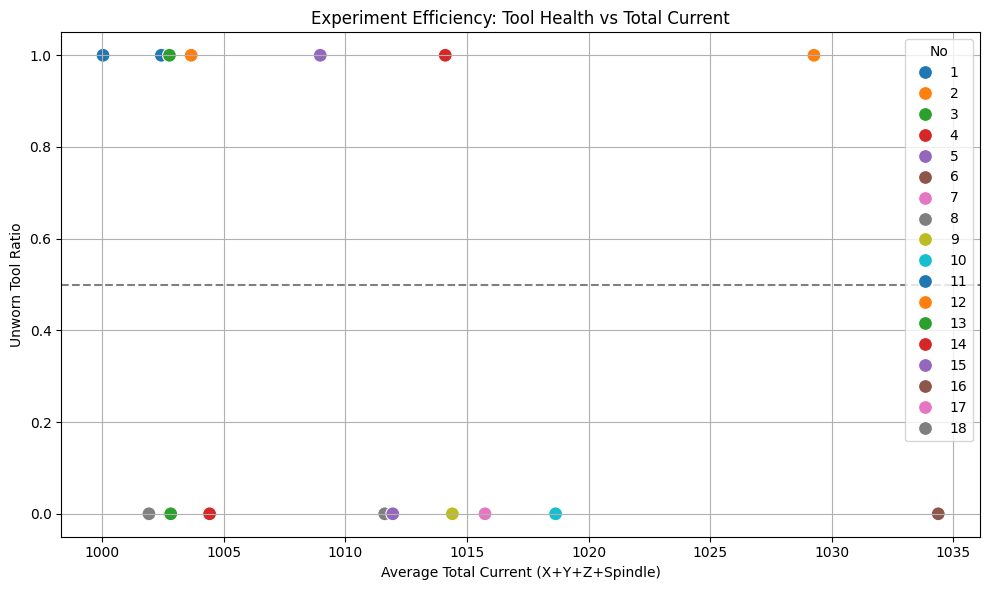

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv(r"C:\Users\pavit\Desktop\CNC_MILLING\merged_dataset.csv")

# Identify current-related columns
current_columns = [col for col in df.columns if 'current' in col.lower()]
print("Current columns:", current_columns)

# Calculate total current usage
df['total_current'] = df[current_columns].sum(axis=1)

# Group by experiment
summary = df.groupby('No').agg(
    total_records=('tool_condition', 'count'),
    unworn_count=('tool_condition', lambda x: (x == 'unworn').sum()),
    worn_count=('tool_condition', lambda x: (x == 'worn').sum()),
    avg_total_current=('total_current', 'mean')
).reset_index()

# Calculate unworn ratio
summary['unworn_ratio'] = summary['unworn_count'] / summary['total_records']

# Sort by unworn_ratio (high) and avg_current (low)
summary_sorted = summary.sort_values(by=['unworn_ratio', 'avg_total_current'], ascending=[False, True])

# Best experiment
best = summary_sorted.iloc[0]
print(f"✅ Best Experiment: ID = {best['No']}")
print(f"🔹 Unworn Tool Ratio: {best['unworn_ratio']:.2f}")
print(f"🔹 Avg Total Current: {best['avg_total_current']:.2f}")

# Visualize performance
plt.figure(figsize=(10,6))
sns.scatterplot(data=summary_sorted, x='avg_total_current', y='unworn_ratio', hue='No', palette='tab10', s=100)
plt.axhline(0.5, color='gray', linestyle='--')
plt.xlabel("Average Total Current (X+Y+Z+Spindle)")
plt.ylabel("Unworn Tool Ratio")
plt.title("Experiment Efficiency: Tool Health vs Total Current")
plt.grid(True)
plt.tight_layout()
plt.show()


In [27]:

# Load the dataset
combined_df = pd.read_csv("merged_dataset.csv")

# Select numeric columns
numeric_cols = combined_df.select_dtypes(include='float64').columns

# Compute statistical features
stat_features = combined_df[numeric_cols].agg(['mean', 'std','skew', 'kurtosis']).T
stat_features.columns = [f'{stat}_{col}' for col in stat_features.columns for stat in [col]]

# Combine back with original or separately use as input
print(stat_features)


                            mean_mean      std_std  skew_skew  \
X1_ActualPosition          158.541455    18.932114   1.282157   
X1_ActualVelocity           -0.292832     5.695460   1.718315   
X1_ActualAcceleration        0.071727    94.497121   0.907253   
X1_CommandPosition         158.540092    18.932358   1.282204   
X1_CommandVelocity          -0.287186     5.701548   1.706174   
X1_CommandAcceleration       0.256521    73.074823  -0.027613   
X1_CurrentFeedback          -0.470487     4.247851   0.268403   
X1_DCBusVoltage              0.066668     0.036794   0.841172   
X1_OutputCurrent           326.928832     1.454054  -0.043027   
X1_OutputVoltage             8.082446     7.715489   2.850834   
X1_OutputPower               0.000618     0.001574   7.553011   
Y1_ActualPosition           98.460585    28.645125   1.260480   
Y1_ActualVelocity           -0.428369     6.045952  -1.436032   
Y1_ActualAcceleration        1.019042    85.619660   0.833849   
Y1_CommandPosition       

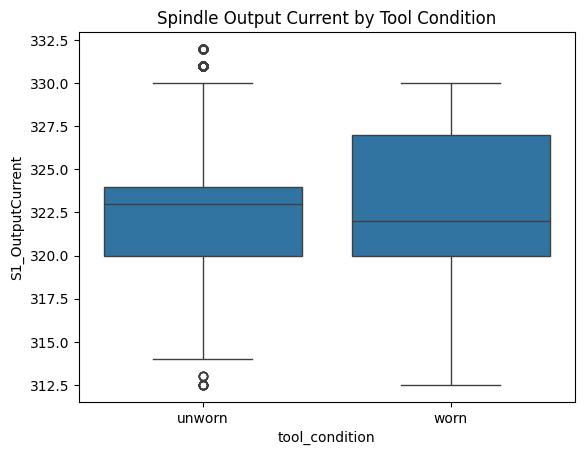

In [28]:
#### Sensor behavior under worn vs unworn tool ####

import seaborn as sns
import matplotlib.pyplot as plt

# Compare a feature distribution (e.g., spindle current) between tool conditions
sns.boxplot(data=final_df, x='tool_condition', y='S1_OutputCurrent')
plt.title('Spindle Output Current by Tool Condition')
plt.show()


In [29]:

from sklearn.preprocessing import LabelEncoder

# Load the dataset
encoded_df = pd.read_csv("merged_dataset.csv")  # Update with correct path


# Label Encoding for binary columns
le = LabelEncoder()
encoded_df["tool_condition"] = le.fit_transform(final_df["tool_condition"])
encoded_df["machining_finalized"] = le.fit_transform(final_df["machining_finalized"])
encoded_df["Machining_Process"] = le.fit_transform(final_df["Machining_Process"])
encoded_df["passed_visual_inspection"] = le.fit_transform(final_df["passed_visual_inspection"])




In [30]:
encoded_df

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,No,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,198.0,0.00,0.00,198.0,0.00,0.000000,0.18,0.0207,329.0,2.77,...,1.0,0.0,50.0,9,1,6,4.0,0,1,2
1,198.0,-10.80,-350.00,198.0,-13.60,-358.000000,-10.90,0.1860,328.0,23.30,...,1.0,4.0,50.0,7,1,6,4.0,0,1,2
2,196.0,-17.80,-6.25,196.0,-17.90,-0.000095,-8.59,0.1400,328.0,30.60,...,1.0,7.0,50.0,7,1,6,4.0,0,1,2
3,194.0,-18.00,0.00,194.0,-17.90,-0.000095,-6.11,0.1300,327.0,30.30,...,1.0,7.0,50.0,7,1,6,4.0,0,1,2
4,193.0,-17.90,-18.80,192.0,-17.90,0.000095,-5.70,0.1140,328.0,30.50,...,1.0,7.0,50.0,7,1,6,4.0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24950,144.0,-2.30,100.00,144.0,-2.57,0.977000,-5.05,0.0732,327.0,9.56,...,1.0,57.0,3.0,0,18,3,2.5,1,1,2
24951,144.0,-2.47,25.00,144.0,-2.46,1.080000,-5.62,0.0996,327.0,10.30,...,1.0,57.0,3.0,0,18,3,2.5,1,1,2
24952,143.0,-2.20,81.20,143.0,-2.35,1.170000,-4.42,0.0539,327.0,7.79,...,1.0,57.0,3.0,0,18,3,2.5,1,1,2
24953,143.0,-2.05,68.70,143.0,-2.23,1.260000,-5.83,0.0809,327.0,8.32,...,1.0,57.0,3.0,0,18,3,2.5,1,1,2


In [31]:
encoded_df.to_csv("encoded_data.csv", index=False)

In [34]:
encoded_df.dtypes

X1_ActualPosition            float64
X1_ActualVelocity            float64
X1_ActualAcceleration        float64
X1_CommandPosition           float64
X1_CommandVelocity           float64
X1_CommandAcceleration       float64
X1_CurrentFeedback           float64
X1_DCBusVoltage              float64
X1_OutputCurrent             float64
X1_OutputVoltage             float64
X1_OutputPower               float64
Y1_ActualPosition            float64
Y1_ActualVelocity            float64
Y1_ActualAcceleration        float64
Y1_CommandPosition           float64
Y1_CommandVelocity           float64
Y1_CommandAcceleration       float64
Y1_CurrentFeedback           float64
Y1_DCBusVoltage              float64
Y1_OutputCurrent             float64
Y1_OutputVoltage             float64
Y1_OutputPower               float64
Z1_ActualPosition            float64
Z1_ActualVelocity            float64
Z1_ActualAcceleration        float64
Z1_CommandPosition           float64
Z1_CommandVelocity           float64
Z

In [54]:
import pandas as pd
import os

# Load the encoded dataset
file_path = r"C:\Users\pavit\Desktop\CNC_MILLING\encoded_data.csv"
df = pd.read_csv(file_path)

# Ensure the 'No' column exists
if 'No' not in df.columns:
    raise ValueError("❌ The 'No' column is missing in the CSV.")

# Create output directory
output_dir = os.path.join(os.path.dirname(file_path), "split_experiments")
os.makedirs(output_dir, exist_ok=True)

# Get unique experiment IDs
experiment_ids = sorted(df['No'].unique())

# Save each experiment as a separate CSV
for exp_id in experiment_ids:
    exp_df = df[df['No'] == exp_id]
    output_path = os.path.join(output_dir, f"encoded_experiment_{int(exp_id)}.csv")
    exp_df.to_csv(output_path, index=False)
    print(f"✅ Saved: {output_path}")

print("\n🎉 All 18 experiments successfully saved in folder:", output_dir)


✅ Saved: C:\Users\pavit\Desktop\CNC_MILLING\split_experiments\encoded_experiment_1.csv
✅ Saved: C:\Users\pavit\Desktop\CNC_MILLING\split_experiments\encoded_experiment_2.csv
✅ Saved: C:\Users\pavit\Desktop\CNC_MILLING\split_experiments\encoded_experiment_3.csv
✅ Saved: C:\Users\pavit\Desktop\CNC_MILLING\split_experiments\encoded_experiment_4.csv
✅ Saved: C:\Users\pavit\Desktop\CNC_MILLING\split_experiments\encoded_experiment_5.csv
✅ Saved: C:\Users\pavit\Desktop\CNC_MILLING\split_experiments\encoded_experiment_6.csv
✅ Saved: C:\Users\pavit\Desktop\CNC_MILLING\split_experiments\encoded_experiment_7.csv
✅ Saved: C:\Users\pavit\Desktop\CNC_MILLING\split_experiments\encoded_experiment_8.csv
✅ Saved: C:\Users\pavit\Desktop\CNC_MILLING\split_experiments\encoded_experiment_9.csv
✅ Saved: C:\Users\pavit\Desktop\CNC_MILLING\split_experiments\encoded_experiment_10.csv
✅ Saved: C:\Users\pavit\Desktop\CNC_MILLING\split_experiments\encoded_experiment_11.csv
✅ Saved: C:\Users\pavit\Desktop\CNC_MILLI

In [35]:
from sklearn.preprocessing import StandardScaler

# Drop any non-numeric or label columns (adjust if needed)
feature_cols = encoded_df.select_dtypes(include=['float64', 'int64']).columns

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the features
scaled_features = scaler.fit_transform(encoded_df[feature_cols])

# Convert back to DataFrame (optional)
scaled_df = pd.DataFrame(scaled_features, columns=feature_cols)


In [36]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

##Step 1: Define features and target
target_col = "tool_condition"  # <-- change this to your actual target column name
X = encoded_df.drop(columns=[target_col])
y = encoded_df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




In [37]:
encoded_df

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,No,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,198.0,0.00,0.00,198.0,0.00,0.000000,0.18,0.0207,329.0,2.77,...,1.0,0.0,50.0,9,1,6,4.0,0,1,2
1,198.0,-10.80,-350.00,198.0,-13.60,-358.000000,-10.90,0.1860,328.0,23.30,...,1.0,4.0,50.0,7,1,6,4.0,0,1,2
2,196.0,-17.80,-6.25,196.0,-17.90,-0.000095,-8.59,0.1400,328.0,30.60,...,1.0,7.0,50.0,7,1,6,4.0,0,1,2
3,194.0,-18.00,0.00,194.0,-17.90,-0.000095,-6.11,0.1300,327.0,30.30,...,1.0,7.0,50.0,7,1,6,4.0,0,1,2
4,193.0,-17.90,-18.80,192.0,-17.90,0.000095,-5.70,0.1140,328.0,30.50,...,1.0,7.0,50.0,7,1,6,4.0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24950,144.0,-2.30,100.00,144.0,-2.57,0.977000,-5.05,0.0732,327.0,9.56,...,1.0,57.0,3.0,0,18,3,2.5,1,1,2
24951,144.0,-2.47,25.00,144.0,-2.46,1.080000,-5.62,0.0996,327.0,10.30,...,1.0,57.0,3.0,0,18,3,2.5,1,1,2
24952,143.0,-2.20,81.20,143.0,-2.35,1.170000,-4.42,0.0539,327.0,7.79,...,1.0,57.0,3.0,0,18,3,2.5,1,1,2
24953,143.0,-2.05,68.70,143.0,-2.23,1.260000,-5.83,0.0809,327.0,8.32,...,1.0,57.0,3.0,0,18,3,2.5,1,1,2


In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

# Step 1: Define your label column
target_col = "tool_condition"  # ⬅️ Replace this with the actual target column in encoded_df

# Step 2: Separate features and target
X = encoded_df.drop(columns=[target_col])
y = encoded_df[target_col]

# Step 3: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 4: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

model = SVC(kernel='rbf')
model.fit(X_train, y_train)

# Step 6: Predict and Evaluate
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[2198  131]
 [  47 2615]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2329
           1       0.95      0.98      0.97      2662

    accuracy                           0.96      4991
   macro avg       0.97      0.96      0.96      4991
weighted avg       0.96      0.96      0.96      4991



In [39]:
from sklearn.model_selection import cross_val_score

# Cross-validation on training set (optional)
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Accuracy Scores:", scores)
print("Mean CV Accuracy:", scores.mean())


Cross-Validation Accuracy Scores: [0.96093163 0.959429   0.95692462 0.96443777 0.96317635]
Mean CV Accuracy: 0.960979873596429


In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

# Use best estimator for prediction
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("\nBest Model Evaluation:\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

print("Accuracy:", accuracy_score(y_test, y_pred_best))



Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Best Model Evaluation:

Confusion Matrix:
 [[2329    0]
 [   0 2662]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2329
           1       1.00      1.00      1.00      2662

    accuracy                           1.00      4991
   macro avg       1.00      1.00      1.00      4991
weighted avg       1.00      1.00      1.00      4991

Accuracy: 1.0


In [41]:
!pip install tensorflow


In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Now reshape for CNN (1D)
timesteps = 10
X_seq = []
y_seq = []

for i in range(len(X_scaled) - timesteps):
    X_seq.append(X_scaled[i:i+timesteps])
    y_seq.append(y[i + timesteps])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# CNN expects 3D input: (samples, timesteps, features)
print(X_seq.shape)  # should be (samples, timesteps, features)


(24945, 10, 49)


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)


In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense

model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_seq.shape[1], X_seq.shape[2])),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Conv1D(32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])


c:\Users\pavit\Desktop\CNC_MILLING\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_seq, y_seq,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8355 - loss: 0.3267 - val_accuracy: 0.5685 - val_loss: 5.2496
Epoch 2/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9953 - loss: 0.0211 - val_accuracy: 0.5691 - val_loss: 7.4619
Epoch 3/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9967 - loss: 0.0143 - val_accuracy: 0.5691 - val_loss: 8.2970
Epoch 4/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9973 - loss: 0.0096 - val_accuracy: 0.5691 - val_loss: 9.9480
Epoch 5/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9985 - loss: 0.0074 - val_accuracy: 0.5691 - val_loss: 11.1350
Epoch 6/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9985 - loss: 0.0040 - val_accuracy: 0.5691 - val_loss: 11.2478


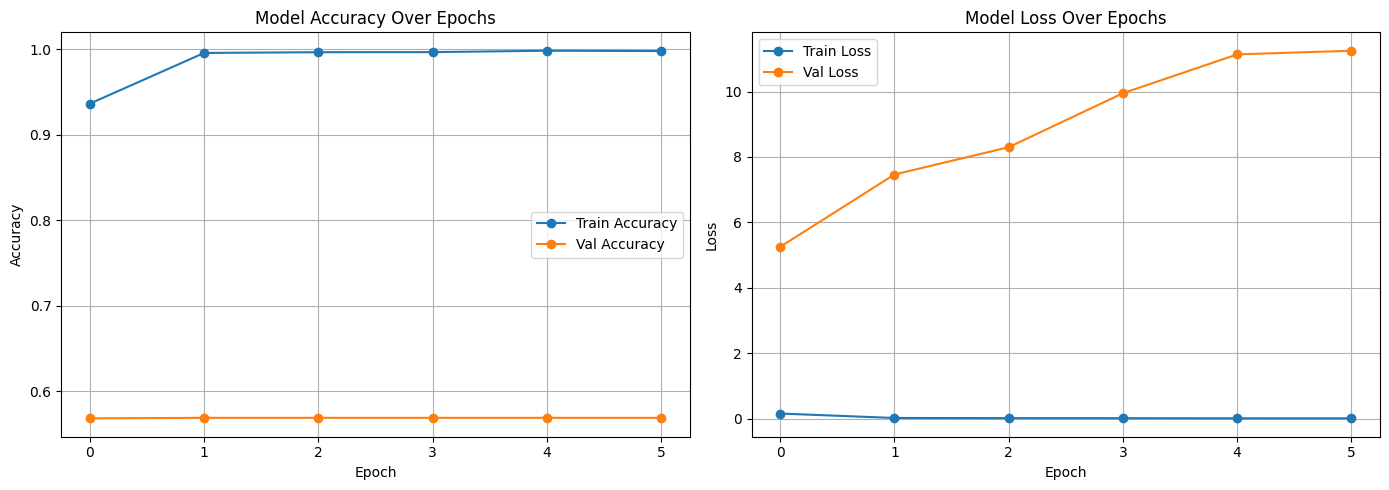

In [46]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [47]:
import json

# Convert history.history (a dictionary) to JSON and save it
with open("training_history.json", "w") as f:
    json.dump(history.history, f)


In [48]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test) > 0.5
print(classification_report(y_test, y_pred))

model.save("model.h5")
print("✅ Model saved as model.h5")



156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


              precision    recall  f1-score   support

           0       0.99      0.82      0.90      2346
           1       0.86      1.00      0.92      2643

    accuracy                           0.91      4989
   macro avg       0.93      0.91      0.91      4989
weighted avg       0.92      0.91      0.91      4989

✅ Model saved as model.h5


In [49]:
import joblib

# If these columns exist
input_df = encoded_df.drop(columns=['tool_condition', 'other_target_column_if_any'], errors='ignore')

# Load previously saved scaler (e.g., StandardScaler or MinMaxScaler)
joblib.dump(scaler, "scaler.joblib")





['scaler.joblib']

In [53]:
import pickle

# Assume your training data is loaded and preprocessed
X_train = encoded_df.drop("tool_condition", axis=1)  # Replace with your actual target column

# Fit the scaler
scaler = StandardScaler()
scaler.fit(X_train)

# Save the scaler
with open("scaler.joblib", "wb") as f:
    joblib.dump(scaler, f)

# Save the list of feature column names
with open("scaler_columns.pkl", "wb") as f:
    pickle.dump(X_train.columns.tolist(), f)
